In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../datasets/final_dataset_feature_engineered_v2.csv').drop_duplicates()

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,super_builtup_area,builtup_area,carpet_area,study room,pooja room,store room,servant room,others,furnishing_type,facility_score
0,house,independent,sector 25,4.35,32222.0,1350.0,Plot area 150(125.42 sq.m.),5,4,3,3.0,North,Old Property,R70162684,NaN,1350.0,NaN,0,0,0,1,0,0,49
1,flat,the close south,sector 50,3.10,12444.0,2491.0,Super Built up area 2491(231.42 sq.m.)Built Up...,3,4,3+,4.0,North-East,Moderately Old,H69433380,2491.0,2450.0,2250.0,0,0,0,1,0,2,165
2,flat,signature global city 63a,sector 63a,1.65,15263.0,1081.0,Super Built up area 1081(100.43 sq.m.),2,2,2,1.0,NaN,Under Construction,G69165782,1081.0,NaN,NaN,0,0,0,0,0,0,0
3,flat,saan verdante,sector 95,2.00,10178.0,1965.0,Super Built up area 1965(182.55 sq.m.)Carpet a...,3,4,3+,5.0,North,New Property,U70096330,1965.0,NaN,1935.0,0,0,0,1,0,0,49
4,flat,puri diplomatic greens,sector 111,3.90,13000.0,3000.0,Super Built up area 3000(278.71 sq.m.)Carpet a...,4,5,3+,6.0,North-East,Relatively New,S69742910,3000.0,NaN,2950.0,0,0,0,1,0,1,160


C:\Users\hp\AppData\Local\Temp\ipykernel_9500\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

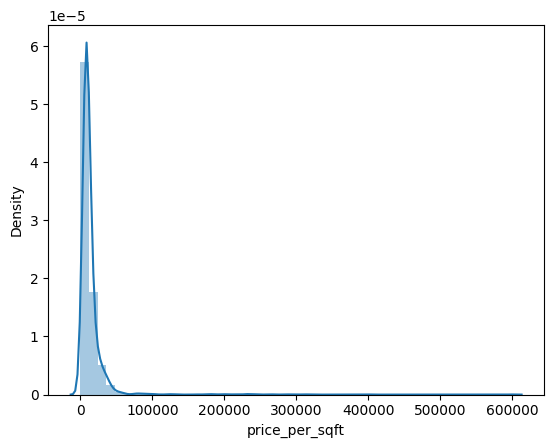

In [5]:
sns.distplot(df['price_per_sqft'])

C:\Users\hp\AppData\Local\Temp\ipykernel_9500\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

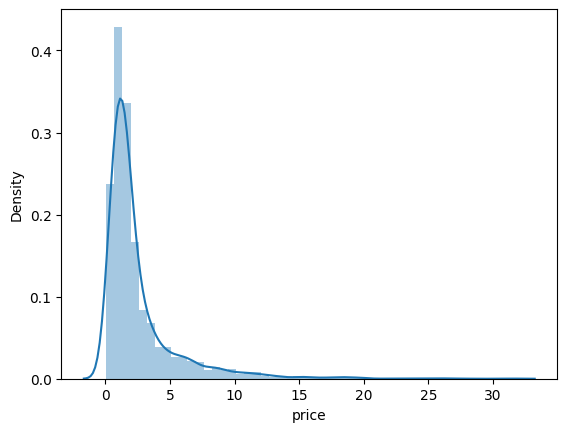

In [6]:
sns.distplot(df['price'])

In [7]:
# skewed data, need to calculate IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# extracting outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")

outliers_stats = outliers['price'].describe()
outliers_stats

Number of outliers: 425


count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

some outliers are. but there is the presence of data errors also

#### price_per_sqft

C:\Users\hp\AppData\Local\Temp\ipykernel_9500\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

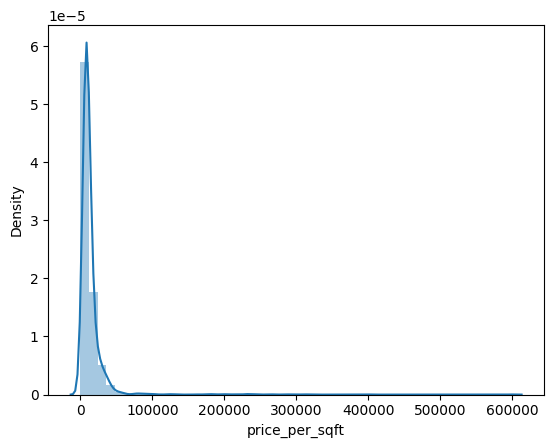

In [8]:
sns.distplot(df['price_per_sqft'])

In [9]:
# skewed data, need to calculate IQR
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# extracting outliers
outliers = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")

outliers_stats = outliers['price_per_sqft'].describe()
outliers_stats

Number of outliers: 354


count       354.000000
mean      52592.612994
std       61150.458507
min       24489.000000
25%       28208.250000
50%       33368.500000
75%       41982.250000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [10]:
# some values which was previously in sq. yards were missed during preprocessing 
outliers['area'] = outliers['area'].apply(lambda x: x*9 if x < 1000 else x)

C:\Users\hp\AppData\Local\Temp\ipykernel_9500\3589034243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['area'] = outliers['area'].apply(lambda x: x*9 if x < 1000 else x)


In [11]:
outliers['price_per_sqft'] = round(outliers['price']*10000000 / outliers['area'])

C:\Users\hp\AppData\Local\Temp\ipykernel_9500\1506143335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['price_per_sqft'] = round(outliers['price']*10000000 / outliers['area'])


In [12]:
outliers['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

values improved. mean decreased. 

In [13]:
# updating changes in original dataframe
df.update(outliers)

C:\Users\hp\AppData\Local\Temp\ipykernel_9500\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

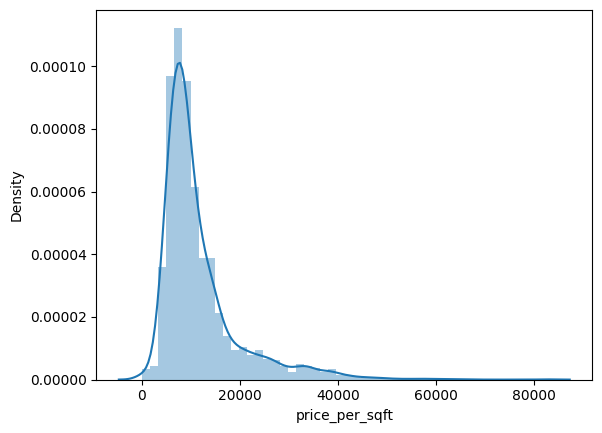

In [14]:
sns.distplot(df['price_per_sqft'])

In [15]:
# performed same thing with more price range
df[df['price_per_sqft'] >50000].shape

(13, 24)

In [16]:
# since only 13 entries are there, we can drop them
df = df[df['price_per_sqft'] <= 50000]

<Axes: ylabel='price_per_sqft'>

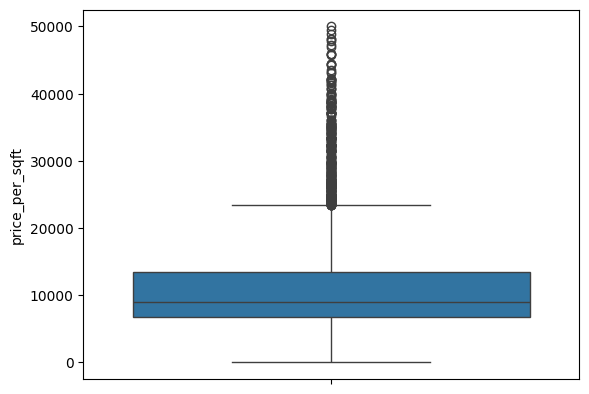

In [17]:
sns.boxplot(df['price_per_sqft'])

#### area

C:\Users\hp\AppData\Local\Temp\ipykernel_9500\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

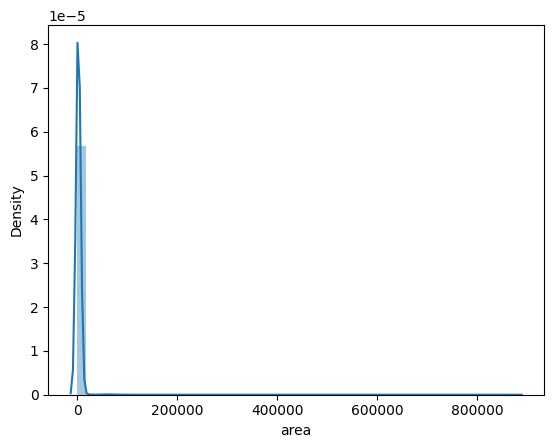

In [18]:
sns.distplot(df['area'])

very much skewed

In [19]:
df['area'].describe()

count      3648.000000
mean       2947.403509
std       23205.020118
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [20]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,super_builtup_area,builtup_area,carpet_area,study room,pooja room,store room,servant room,others,furnishing_type,facility_score
782,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,B70122778,NaN,NaN,514396.0,0,0,0,0,0,0,44
1202,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,Y68589358,NaN,NaN,569243.0,0,0,0,0,0,0,76
1244,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,D70174086,NaN,NaN,607936.0,1,0,0,0,1,0,65
1513,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,Y69214772,NaN,737147.0,NaN,0,0,0,0,0,1,44
2467,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,T68498396,NaN,2.0,NaN,1,1,0,1,1,2,0


In [21]:
# they seem as outliers, checked their price and i think they are outliers, dropping them
df = df[df['area'] < 100000]

C:\Users\hp\AppData\Local\Temp\ipykernel_9500\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

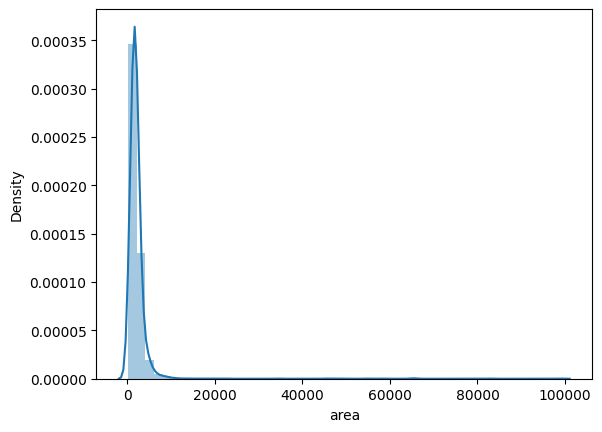

In [22]:
sns.distplot(df['area'])

In [23]:
# for 10000 sq. ft. area
df[df['area'] > 10000].sort_values('area', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,super_builtup_area,builtup_area,carpet_area,study room,pooja room,store room,servant room,others,furnishing_type,facility_score
100,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,Z69661544,NaN,NaN,11000.00,0,1,1,1,0,2,60
2555,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,B68707994,NaN,115.0,NaN,0,0,0,0,1,0,7
2014,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,U69464558,NaN,NaN,64529.00,1,0,0,0,0,0,15
2813,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,C70172232,NaN,NaN,64412.00,0,0,0,0,0,0,51
3108,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,L68155082,NaN,NaN,7250.00,0,0,0,0,0,0,0
453,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,M68651514,NaN,NaN,58141.00,0,0,0,0,0,0,15
1677,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,N70172062,NaN,NaN,54917.00,0,0,0,0,0,0,37
2656,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,R69765432,NaN,NaN,48811.00,1,0,0,0,0,0,37
3035,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,Q69161092,NaN,5800.0,5200.00,0,0,1,1,0,2,109
3049,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,F70174220,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [24]:
df.drop(index=[453, 1677, 2656, 3049, 3748, 2406], inplace=True)

In [25]:
df.loc[3289, 'area'] =  3500
df.loc[1716, 'area'] = 1720

In [26]:
df = df[df['area'] < 10000]

C:\Users\hp\AppData\Local\Temp\ipykernel_9500\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

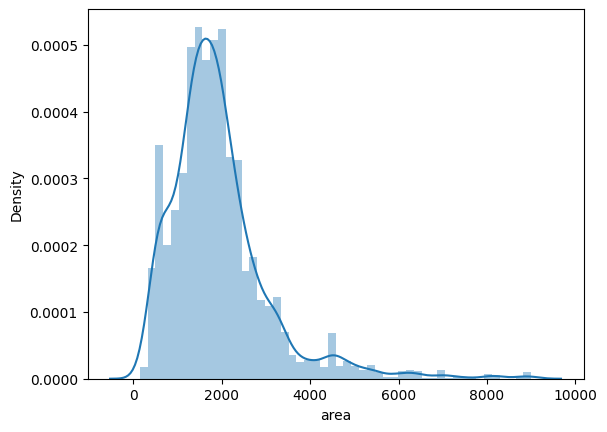

In [27]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

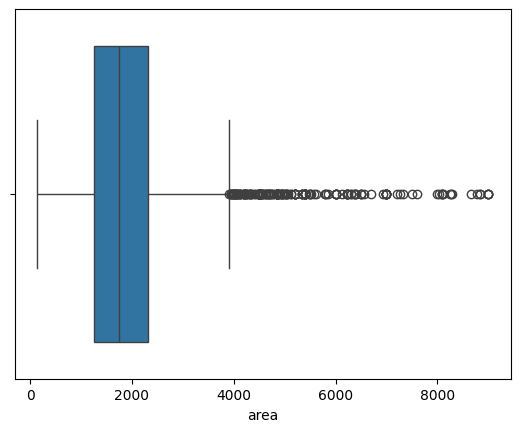

In [28]:
sns.boxplot(x=df['area'])

#### bedroom

C:\Users\hp\AppData\Local\Temp\ipykernel_9500\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

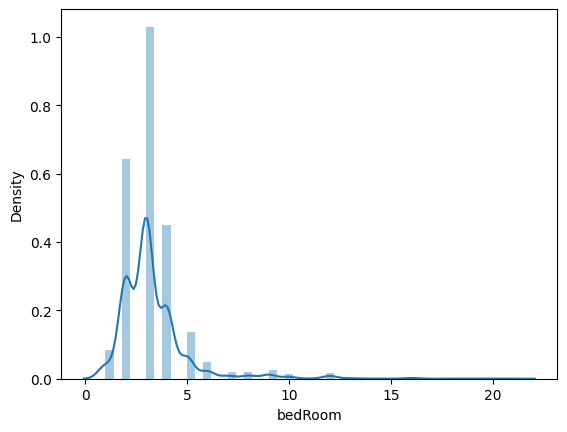

In [29]:
sns.distplot(df['bedRoom'])

In [30]:
df['bedRoom'].describe()

count    3621.000000
mean        3.322839
std         1.817928
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [31]:
df[df['bedRoom'] > 10].sort_values('bedRoom', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,super_builtup_area,builtup_area,carpet_area,study room,pooja room,store room,servant room,others,furnishing_type,facility_score
2617,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,R69483164,NaN,1161.0,NaN,0,0,0,1,0,1,49
356,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,V69218808,NaN,1152.0,NaN,0,0,0,1,0,1,22
2565,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,B65708738,NaN,7500.0,NaN,1,0,1,0,0,0,68
3391,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,P70082842,NaN,1622.0,NaN,1,1,1,1,0,0,74
692,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,H69788864,NaN,1503.0,NaN,0,0,0,0,1,1,57
3509,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,Q69197908,NaN,1440.0,NaN,0,0,0,1,0,1,70
1896,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16,18,3+,4.0,North-East,New Property,D68743678,NaN,2700.0,NaN,0,1,0,1,0,2,49
1317,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,4.0,West,New Property,V68700636,NaN,2700.0,NaN,0,1,0,1,0,2,49
2626,house,dlf city plots,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,I69809690,NaN,4518.0,NaN,1,1,1,1,0,2,153
2825,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16,16,3+,4.0,NaN,New Property,J70268910,NaN,3078.0,NaN,1,1,1,1,0,2,0


In [32]:
# nearly 20 entries were there, dropping them
df = df[df['bedRoom'] <= 10]

In [33]:
df.shape

(3576, 24)

C:\Users\hp\AppData\Local\Temp\ipykernel_9500\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

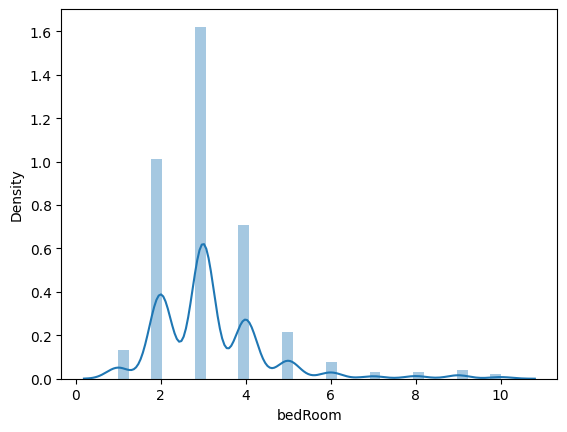

In [34]:
sns.distplot(df['bedRoom'])

bathroom col also had similar distribution

#### super builtup area

C:\Users\hp\AppData\Local\Temp\ipykernel_9500\523907216.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_builtup_area'])


<Axes: xlabel='super_builtup_area', ylabel='Density'>

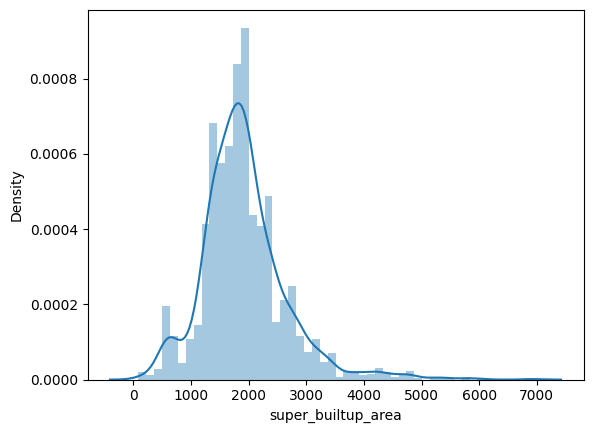

In [35]:
sns.distplot(df['super_builtup_area'])

quite normal, don't think we need to do anything more

#### built_up area

C:\Users\hp\AppData\Local\Temp\ipykernel_9500\2996519323.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['builtup_area'])


<Axes: xlabel='builtup_area', ylabel='Density'>

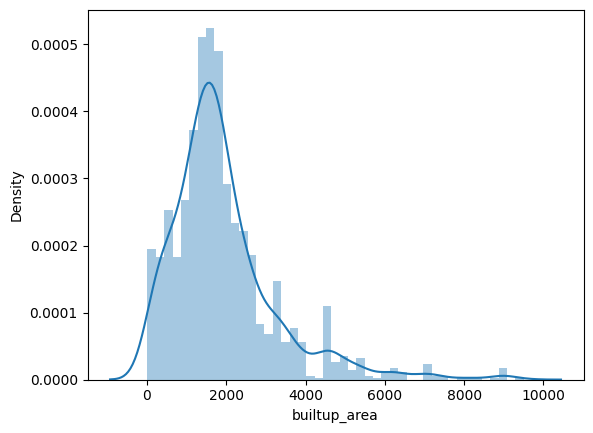

In [36]:
sns.distplot(df['builtup_area'])

C:\Users\hp\AppData\Local\Temp\ipykernel_9500\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

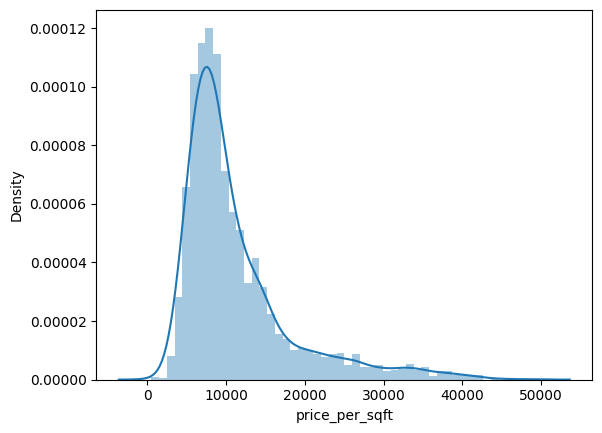

In [39]:
sns.distplot(df['price_per_sqft'])

In [40]:
df.to_csv('../datasets/final_dataset_outlier_detected_v3.csv', index=False)